In [11]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline
import h5py
import numpy as np
import mahotas as mh

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
from threed import ThreeD

In [13]:
DATA = '/home/d/data/toufiq/segmentation.h5'


In [35]:
with h5py.File(DATA,'r') as f:
    vol = f[f.keys()[0]][0:10,0:300,0:300]

In [73]:
np.unique(vol)

array([  0,   1,   2,   3,   4,  23,  25,  32,  33,  35,  42,  50,  56,
        58,  63,  67,  69,  70,  71,  77,  78,  91, 140, 479, 497, 498,
       517, 520, 563, 585, 601, 666, 687, 688, 741], dtype=uint32)

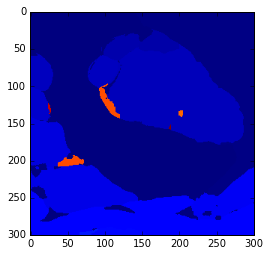

In [36]:
imshow(vol[0])

In [16]:
LABELID = 32

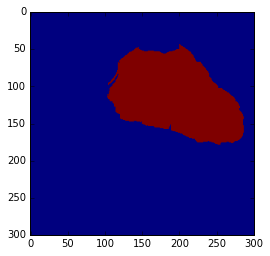

In [101]:
# 1. thresholding
thresholded = ThreeD.threshold(vol, LABELID)
for z in range(thresholded.shape[0]):
    thresholded[z] = mh.close_holes(thresholded[z])
imshow(thresholded[0])

thresholded = np.repeat(thresholded, 10, axis=0)

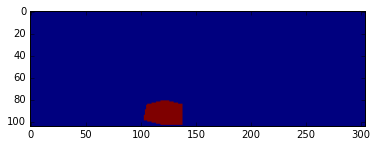

In [104]:
# 2. smoothing along Y
thresholded_swapped = np.swapaxes(thresholded, 0, 1)
# thresholded_swapped = thresholded
thresholded_padded = np.pad(thresholded_swapped, 2, mode='constant')
smoothed = ThreeD.smoothen(thresholded_padded)
imshow(smoothed[3])

In [105]:
# 3. marching cubes
ThreeD.create_mesh(smoothed, '/tmp/outNEW.stl')

In [106]:
import os
os.path.join(1,2,2)

AttributeError: 'int' object has no attribute 'startswith'